In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:

df24 = pd.read_excel('TENDENCIA 2024.xlsx')
df25 = pd.read_excel('TENDENCIA 2025.xlsx')

def preparar_df(df):
    df_limpio = df[df['Mes'] != 'TOTAL'].copy()
    df_largo = df_limpio.melt(id_vars=['Mes'], var_name='SKU', value_name='Ventas')
    return df_largo

df24_largo = preparar_df(df24)
df25_largo = preparar_df(df25)

df_juntos_24_25 = pd.merge(
    df24_largo,
    df25_largo,
    on= ['Mes', 'SKU'],
    suffixes = ('_2024', '_2025')
)
print(df_juntos_24_25.head())

   Mes     SKU  Ventas_2024  Ventas_2025
0    1  CH-300          0.0          1.0
1    2  CH-300          0.0          6.0
2    3  CH-300          0.0          6.0
3    4  CH-300          0.0          1.0
4    5  CH-300          1.0          1.0


In [29]:
print(df_juntos_24_25.head(100))

    Mes      SKU  Ventas_2024  Ventas_2025
0     1   CH-300          0.0          1.0
1     2   CH-300          0.0          6.0
2     3   CH-300          0.0          6.0
3     4   CH-300          0.0          1.0
4     5   CH-300          1.0          1.0
..  ...      ...          ...          ...
95   12    pH-12          0.0          0.0
96    1  PAA-160          0.0         12.0
97    2  PAA-160          0.0         41.0
98    3  PAA-160          0.0         57.0
99    4  PAA-160          0.0         29.0

[100 rows x 4 columns]


In [ ]:
paa160 = df_juntos_24_25[df_juntos_24_25['SKU'] == 'PAA-160']
print(paa160)

     Mes      SKU  Ventas_2024  Ventas_2025
96     1  PAA-160          0.0         12.0
97     2  PAA-160          0.0         41.0
98     3  PAA-160          0.0         57.0
99     4  PAA-160          0.0         29.0
100    5  PAA-160          0.0         42.0
101    6  PAA-160          0.0         36.0
102    7  PAA-160          0.0         74.0
103    8  PAA-160         31.0         21.0
104    9  PAA-160         33.0         35.0
105   10  PAA-160         29.0         65.0
106   11  PAA-160          4.0         45.0
107   12  PAA-160         63.0         87.0


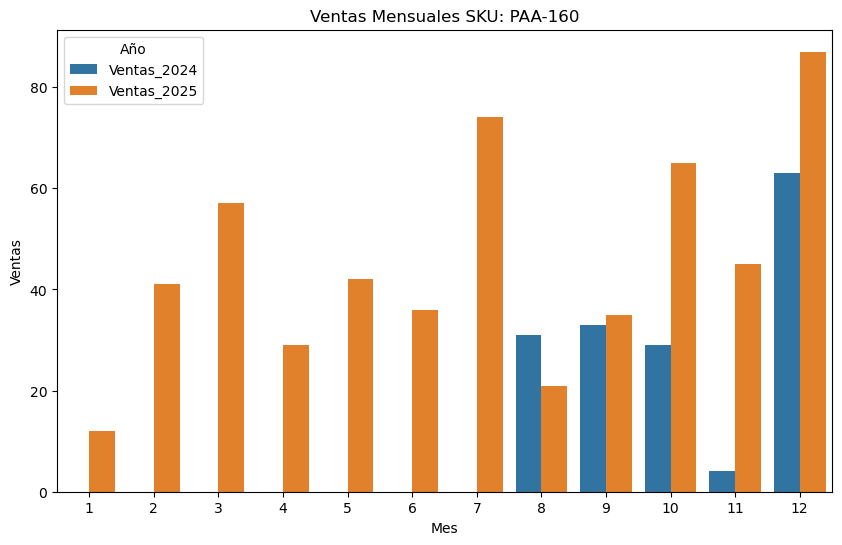

In [17]:
#Grafica de barras
df_plot = paa160.melt(id_vars='Mes', value_vars=['Ventas_2024', 'Ventas_2025'], 
                      var_name='Año', value_name='Ventas')

plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x='Mes', y='Ventas', hue='Año')

plt.title('Ventas Mensuales SKU: PAA-160')
plt.show()

In [20]:
print(df_juntos_24_25)

     Mes     SKU  Ventas_2024  Ventas_2025
0      1  CH-300          0.0          1.0
1      2  CH-300          0.0          6.0
2      3  CH-300          0.0          6.0
3      4  CH-300          0.0          1.0
4      5  CH-300          1.0          1.0
..   ...     ...          ...          ...
523    8  IM-220          0.0          0.0
524    9  IM-220          0.0          0.0
525   10  IM-220          0.0          0.0
526   11  IM-220          3.0          4.0
527   12  IM-220          1.0          1.0

[528 rows x 4 columns]


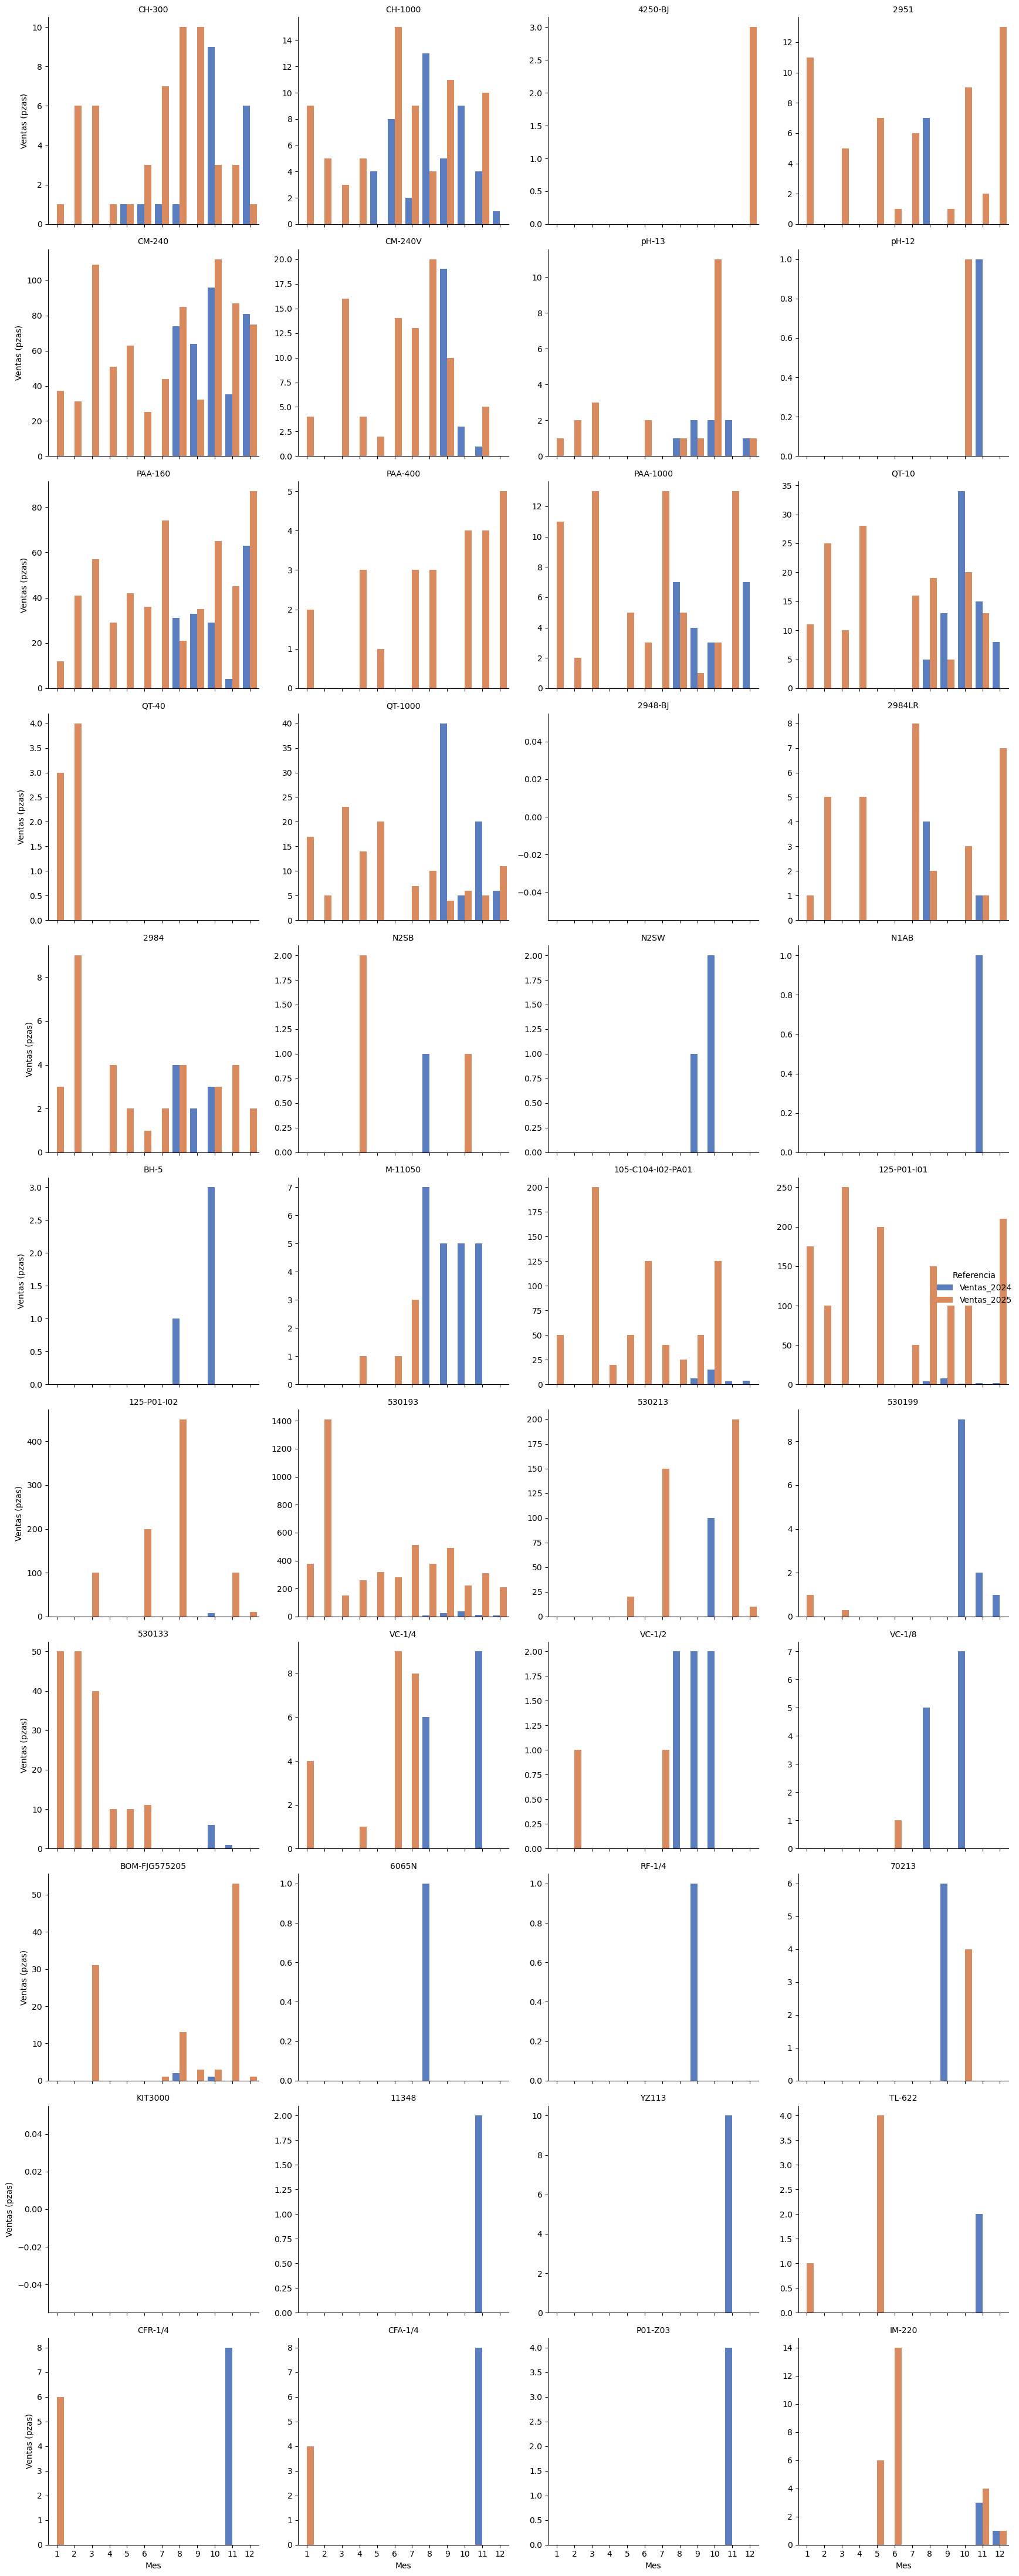

In [ ]:
df_long = df_juntos_24_25.melt(
    id_vars=['Mes', 'SKU'], 
    value_vars=['Ventas_2024', 'Ventas_2025'], 
    var_name='Año', 
    value_name='Ventas (pzas)'
)

g = sns.FacetGrid(df_long, col="SKU", col_wrap=4, height=4, sharey=False)

g.map_dataframe(sns.barplot, x="Mes", y="Ventas (pzas)", hue="Año", palette="muted")

g.add_legend(title="Referencia")
g.set_titles("{col_name}") 
g.set_axis_labels("Mes", "Ventas (pzas)")

plt.tight_layout()
plt.show()